# Week 9 - 4/12/17

Just trying out some of Ilaria's code with some of my matrix reducing methods

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from hm.pop_models.pop_explicit import explicit as pop_explicit
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation
from hm.coarse_grain import clustering

## Initial tests

In [5]:
df = pandas.read_csv("../../data/CDRC/england_welsh_scotland_pwc2011.csv")
x = np.array(df)[:,5][:100]
y = np.array(df)[:,6][:100]
m = np.array(df)[:,2][:100]
xy = np.array([x, y])
xy = np.transpose(xy)
p = pop_explicit(xy, m)

In [6]:
d_max = 2000.
cluster_1 = clustering.Clusters(p, d_max)

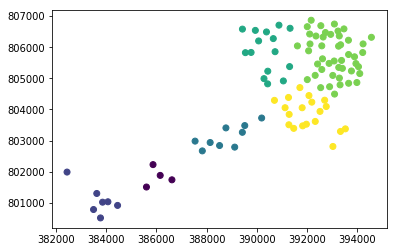

In [10]:
cluster_1.viz_clusters()

## Filtering to London and applying coarse graining

Going to try filtering to a square around London instead of just the first 100 points.

In [11]:
df.columns

Index(['CODE', 'Name', 'TotPop2011', 'HouPop2011', 'HHCnt2011', 'Easting',
       'Northing'],
      dtype='object')

In [6]:
ndf = df[(df['Easting'] < 561966) & (df['Easting'] > 493024)][(df['Northing'] < 207218) & (df['Northing'] > 150912)]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
ndf.head()

,CODE,Name,TotPop2011,HouPop2011,HHCnt2011,Easting,Northing
22761,E01023906,Watford 001C,1485,1485,630,510439,200611
22762,E01023907,Watford 001D,1723,1689,753,510053,200394
22763,E01023904,Watford 001A,1993,1985,777,510678,201163
22765,E01023905,Watford 001B,1882,1882,842,511227,200844
22767,E01023902,Watford 010D,1510,1510,613,510881,195800


In [8]:
ndf.shape

(6061, 7)

6061 locations is pretty manageable. Let's make some clusters.

In [9]:
x = np.array(ndf['Easting'])
y = np.array(ndf['Northing'])
m = np.array(ndf['TotPop2011'])
xy = np.array([x, y]).T
p = pop_explicit(xy, m)

In [10]:
d_max = 1000
LonClusters = clustering.Clusters(p, d_max)

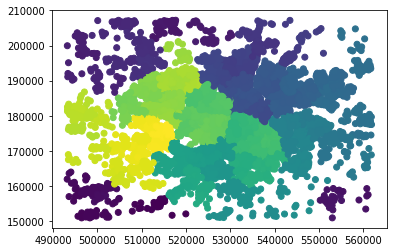

In [11]:
LonClusters.viz_clusters()

Looking nice, how do I access the different hierachies though? Not sure, but I'm going to try my coarse-graining matrix methods. But first we need to sort the ODM method.

In [41]:
from hm.coarse_grain.coarse_matrix import coarse_grain